In [10]:
import pandas as pd

df = pd.read_csv("../results_11a_50_200.csv")

# Quick sanity check
print(df.head())
print(df["alg"].value_counts())


                          instance  \
0  instance31_nreq50_nveh2_gamma50   
1  instance31_nreq50_nveh2_gamma50   
2  instance31_nreq50_nveh2_gamma50   
3  instance31_nreq50_nveh2_gamma50   
4  instance31_nreq50_nveh2_gamma50   

                                            filename   n  nK  gamma    C  \
0  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
1  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
2  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
3  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
4  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   

     rho      alg  alpha  seed  total_time  fairness          obj  iterations  \
0  25.94   nn_det    NaN     1      2956.0  0.548115  2967.721896         1.0   
1  25.94  nn_rand    0.3     1      3870.0  0.922717  3872.004715         1.0   
2  25.94    grasp    0.3     1      2977.0  0.994617  2977.139623      

In [11]:
summary_alg = (
    df.groupby("alg", as_index=False)
      .agg(
          mean_obj      = ("obj", "mean"),
          std_obj       = ("obj", "std"),
          mean_fairness = ("fairness", "mean"),
          std_fairness  = ("fairness", "std"),
          mean_runtime  = ("runtime", "mean"),
          std_runtime   = ("runtime", "std"),
      )
)

print(summary_alg)


       alg      mean_obj       std_obj  mean_fairness  std_fairness  \
0    grasp  14289.340670  10712.954131       0.977225      0.026692   
1   nn_det  10746.361509   7603.927106       0.705578      0.175732   
2  nn_rand  16492.733475  11967.926254       0.973472      0.027637   

   mean_runtime  std_runtime  
0      0.055072     0.044986  
1      0.032842     0.038074  
2      0.042868     0.040507  


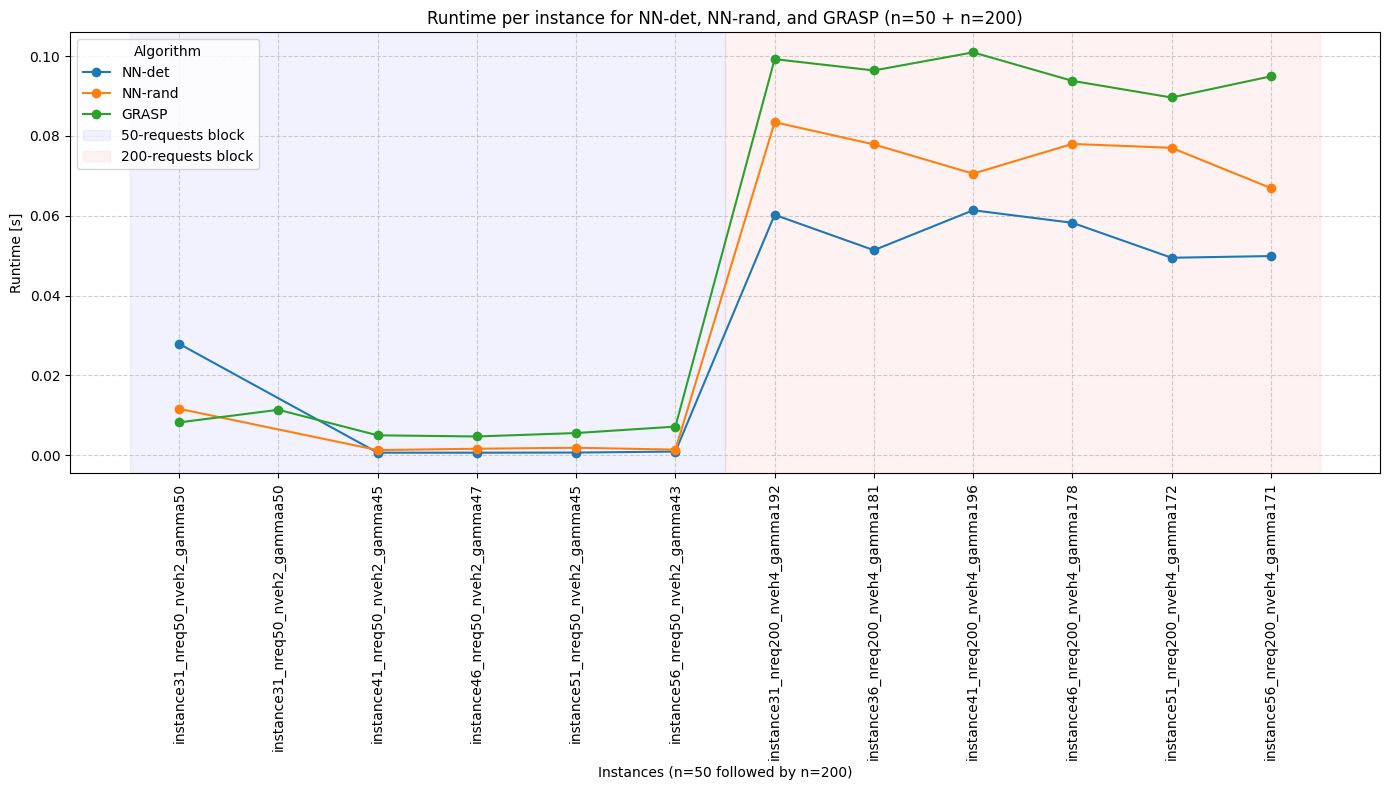

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../results_11a_50_200.csv")

# Extract metadata
df["nreq"] = df["instance"].str.extract(r"nreq(\d+)_")[0].astype(int)
df["inst_num"] = df["instance"].str.extract(r"instance(\d+)_")[0].astype(int)

# Average over seeds for clarity (10 seed points collapse nicely)
g = (df.groupby(["nreq", "inst_num", "instance", "alg"], as_index=False)
       ["runtime"].mean())

# Sort by nreq first (so 50-block then 200-block)
g = g.sort_values(["nreq", "inst_num"])

algs = ["nn_det", "nn_rand", "grasp"]
alg_labels = {"nn_det": "NN-det", "nn_rand": "NN-rand", "grasp": "GRASP"}

# Build the unified x-axis
instances = g["instance"].unique()
x = {inst: i for i, inst in enumerate(instances)}

plt.figure(figsize=(14, 8))

# Plot all algorithms
for alg in algs:
    sub = g[g["alg"] == alg]
    plt.plot(
        [x[i] for i in sub["instance"]],
        sub["runtime"],
        marker="o",
        label=alg_labels.get(alg, alg),
    )

# Styling: mark region boundaries between 50 and 200
bound = g[g["nreq"] == 50]["instance"].nunique()

plt.axvspan(-0.5, bound-0.5, alpha=0.05, color="blue", label="50-requests block")
plt.axvspan(bound-0.5, len(instances)-0.5, alpha=0.05, color="red", label="200-requests block")

# Labels
plt.xticks(range(len(instances)), instances, rotation=90)
plt.ylabel("Runtime [s]")
plt.xlabel("Instances (n=50 followed by n=200)")
plt.title("Runtime per instance for NN-det, NN-rand, and GRASP (n=50 + n=200)")
plt.grid(True, linestyle="--", alpha=0.6)

# Legend (algorithms only ― not shading blocks)
plt.legend(title="Algorithm", loc="upper left")

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd

df = pd.read_csv("../results_11a_50_200.csv")

# Extract metadata
df["nreq"] = df["instance"].str.extract(r"nreq(\d+)_")[0].astype(int)
df["inst_num"] = df["instance"].str.extract(r"instance(\d+)_")[0].astype(int)

# Average across seeds
g = (
    df.groupby(["nreq", "inst_num", "instance", "alg"], as_index=False)
      ["runtime"].mean()
)

# Pivot into wide form: each algorithm is a column
table = g.pivot_table(
    index=["nreq", "inst_num", "instance"],
    columns="alg",
    values="runtime"
).reset_index()

# Sort nicely
table = table.sort_values(["nreq", "inst_num"])

# Optional rounding
table = table.round(3)

# Produce LaTeX
latex_code = table.to_latex(
    index=False,
    escape=False,
    column_format="lllrrr",
    caption="Average runtime per instance for NN-det, NN-rand, and GRASP (n=50 and n=200).",
    label="tab:runtime_50_200"
)

print(latex_code)


\begin{table}
\caption{Average runtime per instance for NN-det, NN-rand, and GRASP (n=50 and n=200).}
\label{tab:runtime_50_200}
\begin{tabular}{lllrrr}
\toprule
nreq & inst_num & instance & grasp & nn_det & nn_rand \\
\midrule
50 & 31 & instance31_nreq50_nveh2_gamma50 & 0.008000 & 0.028000 & 0.012000 \\
50 & 31 & instance31_nreq50_nveh2_gammaa50 & 0.011000 & NaN & NaN \\
50 & 41 & instance41_nreq50_nveh2_gamma45 & 0.005000 & 0.001000 & 0.001000 \\
50 & 46 & instance46_nreq50_nveh2_gamma47 & 0.005000 & 0.001000 & 0.002000 \\
50 & 51 & instance51_nreq50_nveh2_gamma45 & 0.006000 & 0.001000 & 0.002000 \\
50 & 56 & instance56_nreq50_nveh2_gamma43 & 0.007000 & 0.001000 & 0.001000 \\
200 & 31 & instance31_nreq200_nveh4_gamma192 & 0.099000 & 0.060000 & 0.083000 \\
200 & 36 & instance36_nreq200_nveh4_gamma181 & 0.096000 & 0.051000 & 0.078000 \\
200 & 41 & instance41_nreq200_nveh4_gamma196 & 0.101000 & 0.061000 & 0.071000 \\
200 & 46 & instance46_nreq200_nveh4_gamma178 & 0.094000 & 0.058000 & 0

Algorithms found: ['gen_vns', 'ls', 'vnd']


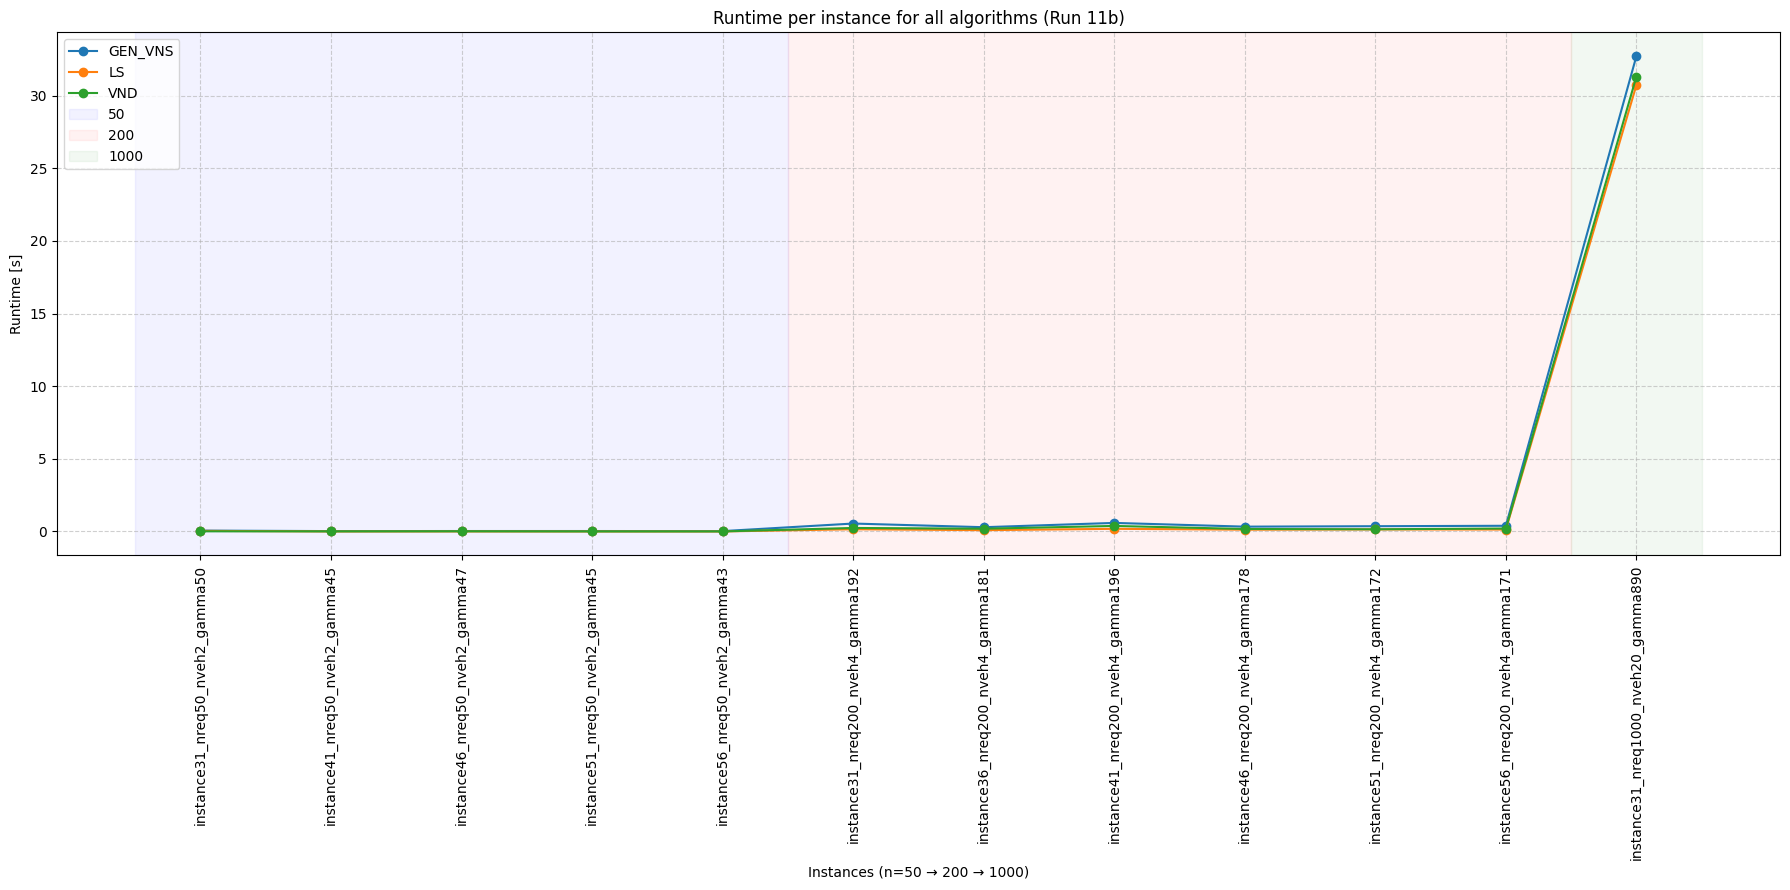

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# ======================================================
# Load your new 11b result files
# ======================================================
files = {
    50: "../results_11b_50.csv",
    200: "../results_11b_200.csv",
    1000: "../results_11b_1000.csv",
}

dfs = []
for nreq, path in files.items():
    df = pd.read_csv(path)
    df["nreq"] = nreq
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# Extract metadata
df["inst_num"] = df["instance"].str.extract(r"instance(\d+)_")[0].astype(int)

# Average over seeds
g = (
    df.groupby(["nreq", "inst_num", "instance", "alg"], as_index=False)["runtime"]
    .mean()
)

# Sort by nreq → instance number
g = g.sort_values(["nreq", "inst_num"])

# ======================================================
# AUTOMATIC: use whatever algorithms exist
# ======================================================
algs = sorted(g["alg"].unique())
print("Algorithms found:", algs)

# Create labels dict automatically
alg_labels = {a: a.upper() for a in algs}

# Build x positions
instances = g["instance"].unique()
xpos = {inst: i for i, inst in enumerate(instances)}

# ======================================================
# Plotting
# ======================================================
plt.figure(figsize=(18, 9))

for alg in algs:
    sub = g[g["alg"] == alg]
    plt.plot(
        [xpos[i] for i in sub["instance"]],
        sub["runtime"],
        marker="o",
        label=alg_labels[alg],
    )

# ======================================================
# Shaded n=50, n=200, n=1000 blocks
# ======================================================
unique_nreqs = sorted(g["nreq"].unique())
current_start = 0
colors = {50: "blue", 200: "red", 1000: "green"}

for n in unique_nreqs:
    count = g[g["nreq"] == n]["instance"].nunique()
    plt.axvspan(
        current_start - 0.5,
        current_start + count - 0.5,
        alpha=0.05,
        color=colors[n],
        label=f"{n}",
    )
    current_start += count

# Labels & formatting
plt.xticks(range(len(instances)), instances, rotation=90)
plt.ylabel("Runtime [s]")
plt.xlabel("Instances (n=50 → 200 → 1000)")
plt.title("Runtime per instance for all algorithms (Run 11b)")
plt.grid(True, linestyle="--", alpha=0.6)

# Remove duplicate legend entries
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys(), loc="upper left")

plt.tight_layout()
plt.show()
